In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import math

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [4]:
df =  pd.read_csv('50-100/50-100_5mV-gaus-smear_x10.csv', sep=',').dropna(axis=0)

train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

y_train = train.drop(train.columns[2:],1) 
x_train = train.iloc[:,2:10]

y_test = test.drop(test.columns[2:],1) 
x_test = test.iloc[:,2:10]

xmin=130
xmax=170
ymin=130
ymax=170

X2 = (y_test.iloc[:,0]>xmin) & (y_test.iloc[:,0]<xmax)
Y2 = (y_test.iloc[:,1]>ymin) & (y_test.iloc[:,1]<ymax)
y_test2 = y_test[X2 & Y2] 
x_test2 = x_test[X2 & Y2]

X_header= y_test.keys()[0] 
Y_header= y_test.keys()[1]

#y_test.loc[y_test[X_header]>25 & y_test[X_header]<75 & y_test[Y_header]>25 & y_test[Y_header]<75]
#x_test.loc[y_test[X_header]>25 & y_test[X_header]<75 & y_test[Y_header]>25 & y_test[Y_header]<75]

Sigma x-axis: 21.04984859322013
Sigma y-axis: 21.147026994664614


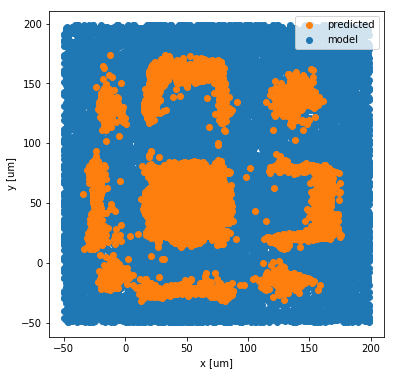

In [5]:
gbr = GradientBoostingRegressor(loss='ls',n_estimators=100,max_depth=8,random_state=0, learning_rate=0.1)
model = MultiOutputRegressor(gbr)
gbr_model = model.fit(x_train, y_train)

yhat = gbr_model.predict(x_test)
yres = y_test-yhat

hist_x = yres.iloc[1:,0]
hist_y = yres.iloc[1:,1]

plt.figure(figsize=(6, 6))

# Plot prediction and test split (laser measurement) on a 2D-map
model = plt.scatter(y_test[X_header],y_test[Y_header])
predicted = plt.scatter(yhat[:,0],yhat[:,1])

plt.xlabel('x [um]')
plt.ylabel('y [um]')
plt.legend((predicted,model),('predicted','model'),loc='upper right')
#plt.savefig('model.png')

mu_x, sigma_x = norm.fit(hist_x)
mu_y, sigma_y = norm.fit(hist_y)

print('Sigma x-axis: '+str(sigma_x))
print('Sigma y-axis: '+str(sigma_y))